In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [155]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample_submission.csv")
feature = ['LotArea', 'TotalBsmtSF', 'GrLivArea', 'PoolArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'GarageArea', 'WoodDeckSF', 'EnclosedPorch', 'LotFrontage', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'ScreenPorch', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'MSSubClass', 'TotRmsAbvGrd']
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [156]:
x = train[feature]
y = train['SalePrice']
x = x.fillna(0)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1460 non-null   int64  
 1   TotalBsmtSF    1460 non-null   int64  
 2   GrLivArea      1460 non-null   int64  
 3   PoolArea       1460 non-null   int64  
 4   FullBath       1460 non-null   int64  
 5   HalfBath       1460 non-null   int64  
 6   BedroomAbvGr   1460 non-null   int64  
 7   GarageArea     1460 non-null   int64  
 8   WoodDeckSF     1460 non-null   int64  
 9   EnclosedPorch  1460 non-null   int64  
 10  LotFrontage    1460 non-null   float64
 11  1stFlrSF       1460 non-null   int64  
 12  2ndFlrSF       1460 non-null   int64  
 13  LowQualFinSF   1460 non-null   int64  
 14  BsmtFullBath   1460 non-null   int64  
 15  BsmtHalfBath   1460 non-null   int64  
 16  ScreenPorch    1460 non-null   int64  
 17  MasVnrArea     1460 non-null   float64
 18  BsmtFinS

In [157]:
y = np.log1p(y)
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.33, random_state=42)

In [158]:
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_val_sc = sc.fit_transform(x_val)
x_test_sc = sc.transform(test[feature].fillna(0))

In [159]:
algo = LinearRegression()
algo.fit(x_train_sc, y_train)

LinearRegression()

In [160]:
y_pre = algo.predict(x_val_sc)
MSE = mean_squared_error(y_val, y_pre)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_val, y_pre)

In [161]:
print(MSE)
print(RMSE)
print(R2)

0.038447637807194616
0.19608069208158824
0.7744069425827456


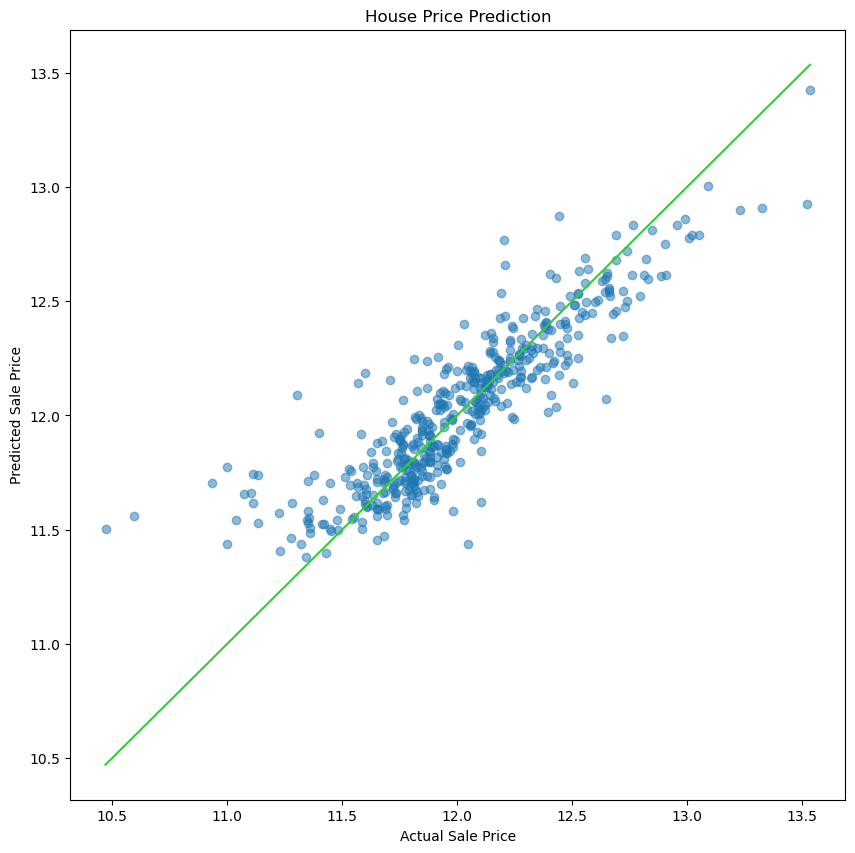

In [162]:
plt.figure(figsize=(10, 10))
plt.scatter(y_val, y_pre, alpha=0.5)
plt.xlabel('Actual Sale Price')
plt.ylabel("Predicted Sale Price")
plt.title("House Price Prediction")
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='limeGreen')
plt.show()